In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
size_acc = pd.read_csv("gtdb-rs202.size_accuracy.csv.gz")
size_acc.head()

,name,alphabet,ksize,scaled,rel_err,probability,alpha-ksize
0,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,1,0.05,1.000000,nucleotide-21
1,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,1000,0.05,0.850210,nucleotide-21
2,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,2000,0.05,0.448999,nucleotide-21
3,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,1,0.10,1.000000,nucleotide-21
4,GCF_000023945.1 s__Halorhabdus utahensis,nucleotide,21,1000,0.10,0.999937,nucleotide-21


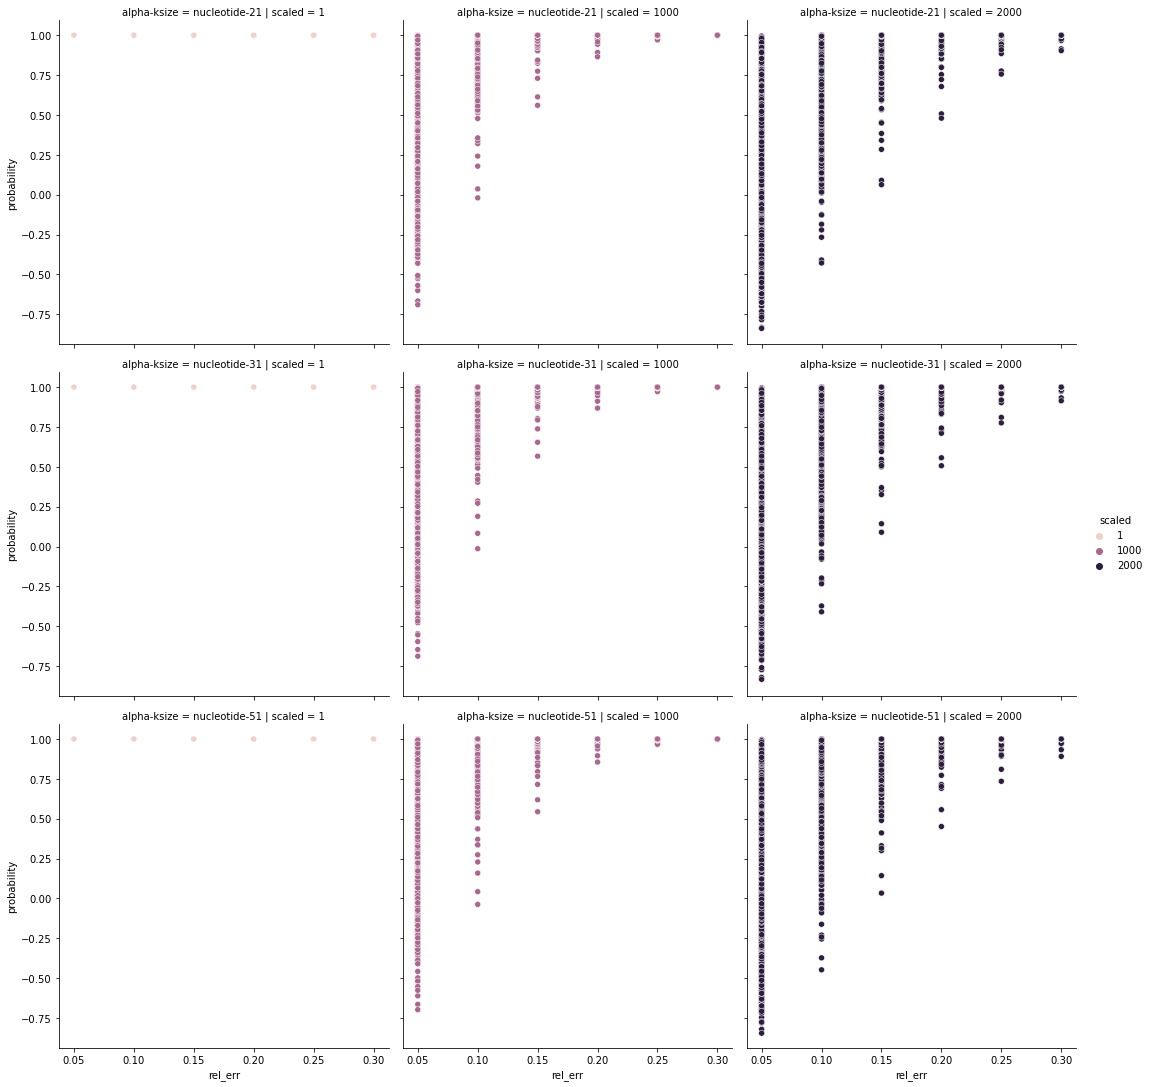

In [11]:
g=sns.relplot(data=size_acc[size_acc["alphabet"] == "nucleotide"], 
              x="rel_err", y="probability", 
              hue="scaled",col="scaled", 
              row="alpha-ksize")

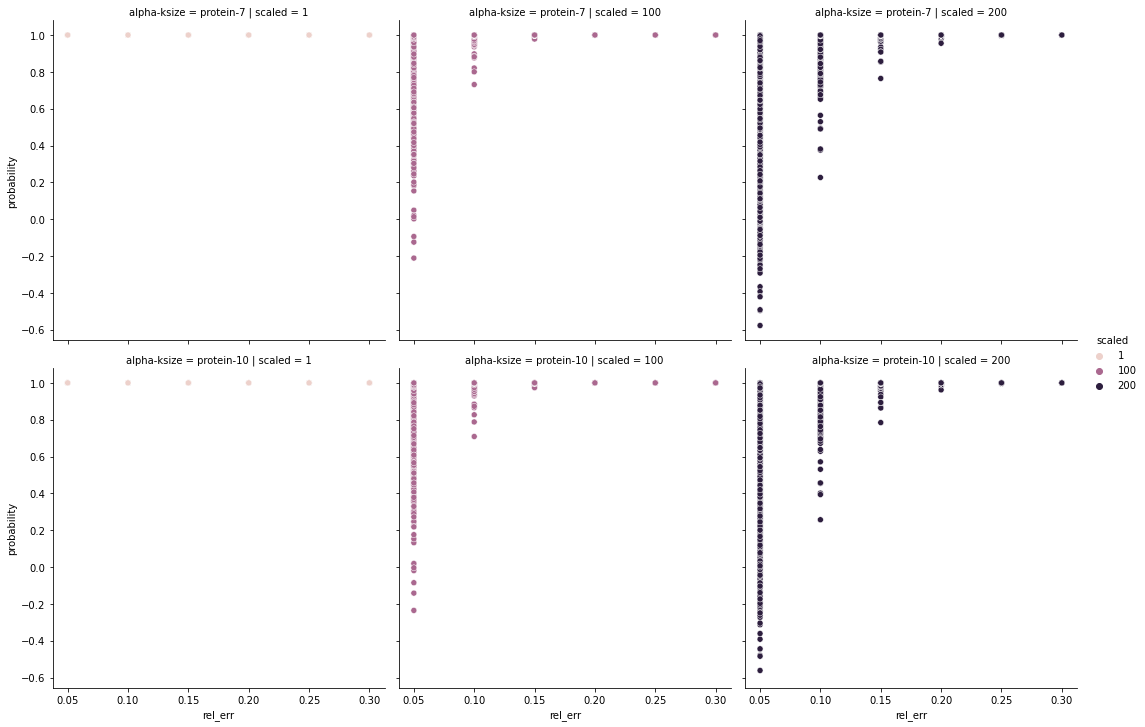

In [12]:
g=sns.relplot(data=size_acc[size_acc["alphabet"] == "protein"], 
              x="rel_err", y="probability", 
              hue="scaled",col="scaled", 
              row="alpha-ksize")

In [49]:
def count_pass_thresh(df, rel_err, scaled, ak, prob_thresh):
    these_params = df[(df["rel_err"] == rel_err) & (df["scaled"] == scaled) & (df["alpha-ksize"] == ak)]
    n_comparisons = len(these_params)
    pass_thresh = these_params[these_params["probability"] >= prob_thresh]
    n_pass_thresh = len(pass_thresh)
    perc = float(n_pass_thresh)/n_comparisons *100
    print(f"{perc:.2f}% {ak} scaled={scaled} comparisons pass threshold ({n_pass_thresh} of {n_comparisons})")

In [50]:
# how often is this happening at our default relative error/probability thresholds?
rel_err = 0.05
prob_thresh = 0.95
scaled = 200
ak = "protein-10"
for ak in ["protein-7", "protein-10"]:
    print("")
    for scaled in [100, 200]:
        count_pass_thresh(size_acc, rel_err, scaled, ak, prob_thresh)

for ak in ["nucleotide-21", "nucleotide-31","nucleotide-51"]:
    print("")
    for scaled in [1000, 2000]:
        count_pass_thresh(size_acc, rel_err, scaled, ak, prob_thresh)


85.88% protein-7 scaled=100 comparisons pass threshold (7835 of 9123)
45.37% protein-7 scaled=200 comparisons pass threshold (4139 of 9123)

85.66% protein-10 scaled=100 comparisons pass threshold (7815 of 9123)
45.43% protein-10 scaled=200 comparisons pass threshold (4145 of 9123)

19.84% nucleotide-21 scaled=1000 comparisons pass threshold (1810 of 9123)
1.10% nucleotide-21 scaled=2000 comparisons pass threshold (100 of 9123)

19.87% nucleotide-31 scaled=1000 comparisons pass threshold (1813 of 9123)
1.09% nucleotide-31 scaled=2000 comparisons pass threshold (99 of 9123)

19.93% nucleotide-51 scaled=1000 comparisons pass threshold (1818 of 9123)
1.10% nucleotide-51 scaled=2000 comparisons pass threshold (100 of 9123)


In [51]:
# try some lower rel err
rel_err = 0.2
prob_thresh = 0.95
scaled = 200
ak = "protein-10"
for ak in ["protein-7", "protein-10"]:
    print("")
    for scaled in [100, 200]:
        count_pass_thresh(size_acc, rel_err, scaled, ak, prob_thresh)

for ak in ["nucleotide-21", "nucleotide-31","nucleotide-51"]:
    print("")
    for scaled in [1000, 2000]:
        count_pass_thresh(size_acc, rel_err, scaled, ak, prob_thresh)


100.00% protein-7 scaled=100 comparisons pass threshold (9123 of 9123)
100.00% protein-7 scaled=200 comparisons pass threshold (9123 of 9123)

100.00% protein-10 scaled=100 comparisons pass threshold (9123 of 9123)
100.00% protein-10 scaled=200 comparisons pass threshold (9123 of 9123)

99.97% nucleotide-21 scaled=1000 comparisons pass threshold (9120 of 9123)
99.45% nucleotide-21 scaled=2000 comparisons pass threshold (9073 of 9123)

99.97% nucleotide-31 scaled=1000 comparisons pass threshold (9120 of 9123)
99.42% nucleotide-31 scaled=2000 comparisons pass threshold (9070 of 9123)

99.97% nucleotide-51 scaled=1000 comparisons pass threshold (9120 of 9123)
99.42% nucleotide-51 scaled=2000 comparisons pass threshold (9070 of 9123)


In [52]:
# try some lower rel err
rel_err = 0.15
prob_thresh = 0.90
scaled = 200
ak = "protein-10"
for ak in ["protein-7", "protein-10"]:
    print("")
    for scaled in [100, 200]:
        count_pass_thresh(size_acc, rel_err, scaled, ak, prob_thresh)

for ak in ["nucleotide-21", "nucleotide-31","nucleotide-51"]:
    print("")
    for scaled in [1000, 2000]:
        count_pass_thresh(size_acc, rel_err, scaled, ak, prob_thresh)


100.00% protein-7 scaled=100 comparisons pass threshold (9123 of 9123)
99.97% protein-7 scaled=200 comparisons pass threshold (9120 of 9123)

100.00% protein-10 scaled=100 comparisons pass threshold (9123 of 9123)
99.95% protein-10 scaled=200 comparisons pass threshold (9118 of 9123)

99.92% nucleotide-21 scaled=1000 comparisons pass threshold (9116 of 9123)
97.11% nucleotide-21 scaled=2000 comparisons pass threshold (8859 of 9123)

99.91% nucleotide-31 scaled=1000 comparisons pass threshold (9115 of 9123)
97.10% nucleotide-31 scaled=2000 comparisons pass threshold (8858 of 9123)

99.90% nucleotide-51 scaled=1000 comparisons pass threshold (9114 of 9123)
97.17% nucleotide-51 scaled=2000 comparisons pass threshold (8865 of 9123)
